In [1]:
import pandas as pd
import numpy as np

file_path = '/home/vlad_322/Downloads/Lab3_Datasetі/En_In.xls'

data = pd.read_excel(file_path, skiprows=17, nrows=227, usecols="C:F")

data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [2]:
data[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = data[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].apply(pd.to_numeric, errors='coerce')
data['Energy Supply'] = data['Energy Supply'] * 1_000_000

data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [3]:
rename_dict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

data['Country'] = data['Country'].replace(rename_dict)
renamed_countries = data[data['Country'].isin(rename_dict.values())]
renamed_countries

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353
214,United Kingdom,7.920000e+09,124.0,10.600470
216,United States,9.083800e+10,286.0,11.570980


In [4]:
data.loc[data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [5]:
csv_file_path = '/home/vlad_322/Downloads/Lab3_Datasetі/gpd.csv'
gpd_data = pd.read_csv(csv_file_path, skiprows=4)

rename_dict_gpd = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

gpd_data['Country Name'] = gpd_data['Country Name'].replace(rename_dict_gpd)
renamed_countries_gpd = gpd_data[gpd_data['Country Name'].isin(rename_dict_gpd.values())]
print (renamed_countries_gpd)
gpd_data.head(10)

    Country Name Country Code                            Indicator Name  \
93     Hong Kong          HKG  GDP at market prices (constant 2010 US$)   
109         Iran          IRN  GDP at market prices (constant 2010 US$)   
123  South Korea          KOR  GDP at market prices (constant 2010 US$)   

     Indicator Code          1960          1961          1962          1963  \
93   NY.GDP.MKTP.KD           NaN           NaN           NaN           NaN   
109  NY.GDP.MKTP.KD  5.500820e+10  6.072406e+10  6.552689e+10  7.014134e+10   
123  NY.GDP.MKTP.KD  2.757696e+10  2.893825e+10  2.964966e+10  3.247578e+10   

             1964          1965  ...          2006          2007  \
93            NaN  1.764691e+10  ...  2.019164e+11  2.149698e+11   
109  7.608598e+10  8.904776e+10  ...  3.895523e+11  4.250646e+11   
123  3.493136e+10  3.674434e+10  ...  9.410199e+11  9.924316e+11   

             2008          2009          2010          2011          2012  \
93   2.195440e+11  2.141452e+11 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
scimagojr_file_path = '/home/vlad_322/Downloads/Lab3_Datasetі/scimagojr.xlsx'
scimagojr_data = pd.read_excel(scimagojr_file_path)

top_15_scimagojr = scimagojr_data[scimagojr_data['Rank'] <= 15]
energy_data_filtered = data[data['Country'].isin(top_15_scimagojr['Country'])]
gpd_data_filtered = gpd_data[gpd_data['Country Name'].isin(top_15_scimagojr['Country'])]
gpd_data_filtered = gpd_data_filtered[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
gpd_data_filtered.rename(columns={'Country Name': 'Country'}, inplace=True)

merged_data = pd.merge(top_15_scimagojr, energy_data_filtered, on='Country', how='inner')
final_data = pd.merge(merged_data, gpd_data_filtered, on='Country', how='inner')
final_data.set_index('Country', inplace=True)
final_data = final_data[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                         'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                         '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

final_data

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [7]:
final_data.shape

(15, 20)

In [8]:
pd.options.display.float_format = '{:.0f}'.format

def task_eight(final_data):
    gpd_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    # Розрахунок середнього ВВП за кожен рядок (країну)
    avg_gpd = final_data[gpd_columns].mean(axis=1)
    
    avg_gpd_series = pd.Series(avg_gpd.values, index=top_15_scimagojr["Country"], name="Average GPD")
    
    avg_gpd_series = avg_gpd_series.sort_values(ascending=False)
    
    return avg_gpd_series

average_gpd = task_eight(final_data)
average_gpd

Country
United States        15364344302990
China                 6348608932836
Japan                 5542207638235
Germany               3493025339073
France                2681724635762
United Kingdom        2487906661418
Brazil                2189794143775
Italy                 2120175089934
India                 1769297396604
Canada                1660647466308
Russian Federation    1565459478481
Spain                 1418078278146
Australia             1164042729991
South Korea           1106714508245
Iran                   444155754051
Name: Average GPD, dtype: float64

In [9]:
def task_nine(final_data):
    average_gpd_series = task_eight(final_data)
    
    fifth_highest_country = average_gpd_series.index[4]
    
    if fifth_highest_country in final_data.index:
        fifth_country_data = final_data.loc[fifth_highest_country]
        gdp_change = float(fifth_country_data['2015']) - float(fifth_country_data['2006'])
        return (fifth_highest_country, gdp_change)
    else:
        print("Дані для обраної країни не знайдено.")
        return None

result = task_nine(final_data)
result

('France', 153345695364.24023)

In [10]:
def task_ten(final_data):
    country = final_data['% Renewable'].idxmax()
    max_percentage = final_data.loc[country, '% Renewable']
    
    return (country, float(max_percentage))

result = task_ten(final_data)
result

('Brazil', 69.64803)

In [11]:
def task_eleven(final_data):
    final_data['Population'] = final_data['Energy Supply'] / final_data['Energy Supply per Capita']
    sixth_country = final_data.sort_values(by='Population', ascending=False).iloc[5]

    sixth_country_name = sixth_country.name
    population = sixth_country['Population']

    return (sixth_country_name, float(population))

result = task_eleven(final_data)
result

('Japan', 127409395.97315437)

In [12]:
def task_twelve(final_data):
    final_data['Citable Documents per Capita'] = final_data['Citable documents'] / final_data['Population']

    correlation = final_data['Citable Documents per Capita'].corr(final_data['Energy Supply per Capita'])

    return float(correlation)

result = task_twelve(final_data)
result

0.7940010435442946

In [13]:
def task_thirteen(final_data):
    median_renewable = final_data['% Renewable'].median()
    
    final_data['Renewable Energy Classification'] = (final_data['% Renewable'] >= median_renewable).astype(int)
    
    return final_data[['Renewable Energy Classification']]

result = task_thirteen(final_data)
print(result)

                    Renewable Energy Classification
Country                                            
China                                             1
United States                                     0
Japan                                             0
United Kingdom                                    0
Russian Federation                                1
Canada                                            1
Germany                                           1
India                                             0
France                                            1
South Korea                                       0
Italy                                             1
Spain                                             1
Iran                                              0
Australia                                         0
Brazil                                            1


In [14]:
ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

def task_forteen(final_data, continent_dict):
    final_data['Continent'] = final_data.index.map(continent_dict)
    grouped = final_data.groupby('Continent')['Population'].agg(
        size='count',
        sum='sum',
        mean='mean',
        std='std'
    )

    return grouped

result = task_forteen(final_data, ContinentDict)
result

,size,sum,mean,std
Continent,,,,
Asia,5,2898666387,579733277,679097888
Australia,1,23316017,23316017,NaN
Europe,6,457929667,76321611,34647667
North America,2,352855249,176427625,199669645
South America,1,205915254,205915254,NaN


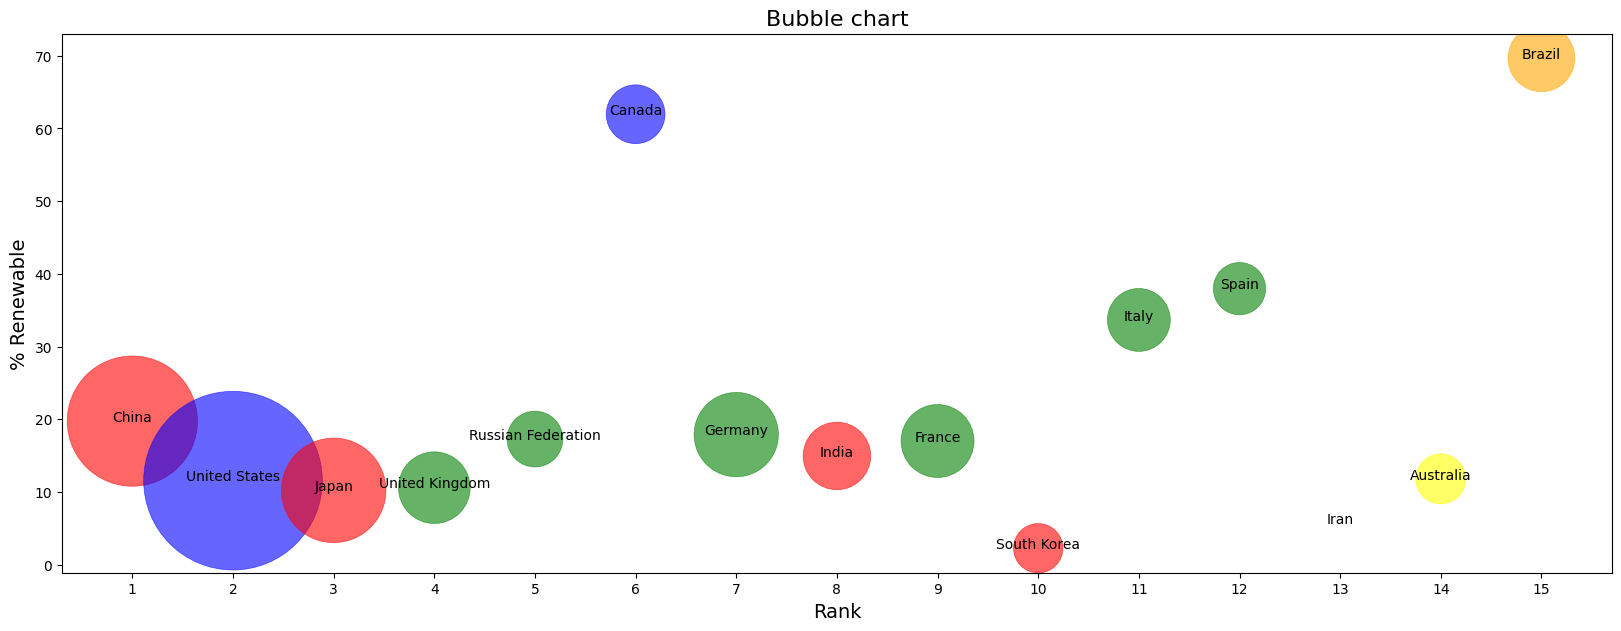

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

continent_colors = {
    'Asia': 'red',
    'North America': 'blue',
    'Europe': 'green',
    'Australia': 'yellow',
    'South America': 'orange'
}

plt.figure(figsize=(20, 7))

bubble = plt.scatter(
    final_data['Rank'],
    final_data['% Renewable'],
    s=final_data['2015'] / 1e9,
    c=final_data['Continent'].map(continent_colors),
    alpha=0.6,
    linewidth=0.5
)

for i in range(len(final_data)):
    plt.annotate(
        final_data.index[i],
        (final_data['Rank'].iloc[i], final_data['% Renewable'].iloc[i]),
        fontsize=10,
        ha='center'
    )

plt.title('Bubble chart', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('% Renewable', fontsize=14)

plt.xticks(final_data['Rank'])

plt.show()